In [1]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
date_columns = ["fecha reporte web", "Fecha de recuperación", "Fecha de diagnóstico", 
                "Fecha de inicio de síntomas", "Fecha de muerte", "Fecha de notificación"]

cat_columns = ["Sexo", "Tipo de contagio", "Estado", "Ubicación del caso", "Tipo de contagio",
               "Nombre departamento", "Nombre municipio", "Recuperado", "Tipo de recuperación"]

categorical_columns = {column:"category" for column in cat_columns}


In [3]:
df = pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD",
                 skiprows = list(range(-12, 0, 1)))

C:\Users\franc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,17,19,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format = '%d/%m/%Y %H:%M:%S')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015042 entries, 0 to 5015041
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha reporte web             datetime64[ns]
 1   ID de caso                    int64         
 2   Fecha de notificación         datetime64[ns]
 3   Código DIVIPOLA departamento  int64         
 4   Nombre departamento           object        
 5   Código DIVIPOLA municipio     int64         
 6   Nombre municipio              object        
 7   Edad                          int64         
 8   Unidad de medida de edad      int64         
 9   Sexo                          object        
 10  Tipo de contagio              object        
 11  Ubicación del caso            object        
 12  Estado                        object        
 13  Código ISO del país           float64       
 14  Nombre del país               object        
 15  Recuperado                    ob

In [6]:
df.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-03-06,1,2020-03-02,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,2020-02-27,NaT,2020-03-06,2020-03-13,PCR,6.0,NaN
1,2020-03-09,2,2020-03-06,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,2020-03-04,NaT,2020-03-09,2020-03-19,PCR,5.0,NaN
2,2020-03-09,3,2020-03-07,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,2020-02-29,NaT,2020-03-09,2020-03-15,PCR,6.0,NaN
3,2020-03-11,4,2020-03-09,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,2020-03-06,NaT,2020-03-11,2020-03-26,PCR,6.0,NaN
4,2020-03-11,5,2020-03-09,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,2020-03-08,NaT,2020-03-11,2020-03-23,PCR,6.0,NaN


In [7]:
df.isna().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                20200
Estado                            20200
Código ISO del país             5011902
Nombre del país                 5011894
Recuperado                        16968
Fecha de inicio de síntomas      483529
Fecha de muerte                 4867304
Fecha de diagnóstico               4106
Fecha de recuperación            156651
Tipo de recuperación             156652
Pertenencia étnica                 6036
Nombre del grupo étnico         4944152
dtype: int64

In [8]:
for cat in cat_columns:
    print(f"Unique records {cat}:",df[cat].unique(),"\n----------------------------------------\n")

Unique records Sexo: ['F' 'M' 'f' 'm'] 
----------------------------------------

Unique records Tipo de contagio: ['Importado' 'Relacionado' 'Comunitaria' 'En estudio'] 
----------------------------------------

Unique records Estado: ['Leve' 'Fallecido' nan 'leve' 'LEVE' 'Moderado' 'Grave'] 
----------------------------------------

Unique records Ubicación del caso: ['Casa' 'Fallecido' nan 'casa' 'CASA' 'Hospital' 'Hospital UCI'] 
----------------------------------------

Unique records Tipo de contagio: ['Importado' 'Relacionado' 'Comunitaria' 'En estudio'] 
----------------------------------------

Unique records Nombre departamento: ['BOGOTA' 'VALLE' 'ANTIOQUIA' 'CARTAGENA' 'HUILA' 'META' 'RISARALDA'
 'NORTE SANTANDER' 'CALDAS' 'CUNDINAMARCA' 'BARRANQUILLA' 'SANTANDER'
 'QUINDIO' 'TOLIMA' 'CAUCA' 'STA MARTA D.E.' 'CESAR' 'SAN ANDRES'
 'CASANARE' 'NARIÑO' 'ATLANTICO' 'BOYACA' 'CORDOBA' 'BOLIVAR' 'SUCRE'
 'MAGDALENA' 'GUAJIRA' 'CHOCO' 'AMAZONAS' 'CAQUETA' 'PUTUMAYO' 'ARAUCA'
 'VAUP

In [9]:
df[cat_columns].replace({np.nan: "NaN"}, inplace = True)
for col in ["Sexo", "Estado", "Ubicación del caso", "Nombre departamento", "Recuperado"]:
    for record in df[col].unique():
        if(col != "Nombre departamento"):
            try:
                df.loc[:,col].replace({record.lower() : record.title(), record.upper() : record.title()}, inplace= True)
            except:
                print(f"{record} in {col}\n")
        else:
            df.loc[:,col].replace({record.title() : record.upper()}, inplace= True)
for col in ["Sexo", "Estado", "Ubicación del caso", "Nombre departamento", "Recuperado"]:
    print(f"Unique records {col}:",df[col].unique(),"\n----------------------------------------\n")

C:\Users\franc\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


nan in Estado

nan in Ubicación del caso

nan in Recuperado

Unique records Sexo: ['F' 'M'] 
----------------------------------------

Unique records Estado: ['Leve' 'Fallecido' nan 'Moderado' 'Grave'] 
----------------------------------------

Unique records Ubicación del caso: ['Casa' 'Fallecido' nan 'Hospital' 'Hospital UCI'] 
----------------------------------------

Unique records Nombre departamento: ['BOGOTA' 'VALLE' 'ANTIOQUIA' 'CARTAGENA' 'HUILA' 'META' 'RISARALDA'
 'NORTE SANTANDER' 'CALDAS' 'CUNDINAMARCA' 'BARRANQUILLA' 'SANTANDER'
 'QUINDIO' 'TOLIMA' 'CAUCA' 'STA MARTA D.E.' 'CESAR' 'SAN ANDRES'
 'CASANARE' 'NARIÑO' 'ATLANTICO' 'BOYACA' 'CORDOBA' 'BOLIVAR' 'SUCRE'
 'MAGDALENA' 'GUAJIRA' 'CHOCO' 'AMAZONAS' 'CAQUETA' 'PUTUMAYO' 'ARAUCA'
 'VAUPES' 'GUAINIA' 'VICHADA' 'GUAVIARE'] 
----------------------------------------

Unique records Recuperado: ['Recuperado' 'Fallecido' nan 'Activo'] 
----------------------------------------



In [10]:
df_cat = df.astype(categorical_columns)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015042 entries, 0 to 5015041
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha reporte web             datetime64[ns]
 1   ID de caso                    int64         
 2   Fecha de notificación         datetime64[ns]
 3   Código DIVIPOLA departamento  int64         
 4   Nombre departamento           category      
 5   Código DIVIPOLA municipio     int64         
 6   Nombre municipio              category      
 7   Edad                          int64         
 8   Unidad de medida de edad      int64         
 9   Sexo                          category      
 10  Tipo de contagio              category      
 11  Ubicación del caso            category      
 12  Estado                        category      
 13  Código ISO del país           float64       
 14  Nombre del país               object        
 15  Recuperado                    ca

In [11]:
# Later in this notebook, I will use a geojson with this department names
df_cat["Nombre departamento"] = df_cat["Nombre departamento"].replace({"VALLE" : "VALLE DEL CAUCA",
                                                               "GUAJIRA": "LA GUAJIRA",
                                                               "BARRANQUILLA" : "ATLANTICO", 
                                                               "CARTAGENA" : "BOLIVAR", 
                                                               "STA MARTA D.E." : "MAGDALENA",
                                                               "BOGOTA" : "SANTAFE DE BOGOTA D.C"})

In [12]:
df_sexo_estado = df_cat.groupby(["Sexo", "Estado"], as_index = False).size()
df_sexo_estado.rename(columns={'size' : 'Total'}, inplace = True)
df_sexo_estado

,Sexo,Estado,Total
0,F,Fallecido,49700
1,F,Grave,145
2,F,Leve,2572875
3,F,Moderado,1379
4,M,Fallecido,77833
5,M,Grave,216
6,M,Leve,2291135
7,M,Moderado,1559


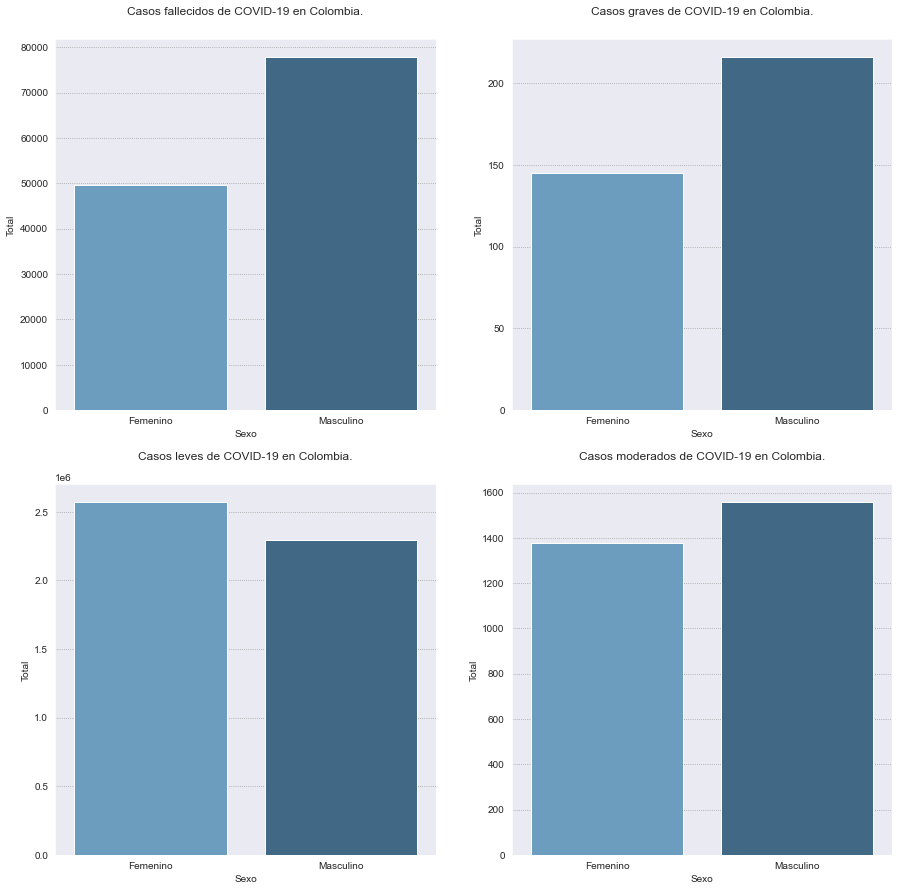

In [13]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize = (15,15))
for idx, estado in enumerate(df_sexo_estado.Estado.unique()):
    plt.subplot(2, 2, 1 + idx)
    sns.barplot(x = "Sexo", y = "Total", data = df_sexo_estado.query(f"Estado ==  '{estado}'"),
                palette = "Blues_d")
    labels = ["Femenino", "Masculino"]
    plt.xticks([0, 1],labels)
    plt.title(f"Casos {estado.lower()}s de COVID-19 en Colombia.", y = 1.05)
plt.show()

In [14]:
df_cont_dia = df_cat.groupby("fecha reporte web").size().to_frame("Contagios")
df_cont_dia["Acumulado Contagios"] = df_cont_dia.Contagios.cumsum()
df_cont_dia

,Contagios,Acumulado Contagios
fecha reporte web,,
2020-03-06,1,1
2020-03-09,2,3
2020-03-11,6,9
2020-03-12,5,14
2020-03-13,5,19
...,...,...
2021-11-03,1697,5007099
2021-11-04,1908,5009007
2021-11-05,1975,5010982


In [15]:
df_muertes = df_cat.query("Estado == 'Fallecido'").sort_values(by = "Fecha de muerte").set_index("Fecha de muerte")
df_muertes.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
Fecha de muerte,,,,,,,,,,,,,,,,,,,,,
2020-03-10,2021-03-11,2288397,2021-03-10,76,VALLE DEL CAUCA,76001,CALI,51,1,F,...,Fallecido,NaN,NaN,Fallecido,2020-03-10,2021-03-10,NaT,NaN,6.0,NaN
2020-03-11,2021-03-12,2292264,2021-03-06,25,CUNDINAMARCA,25269,FACATATIVA,28,1,F,...,Fallecido,NaN,NaN,Fallecido,2020-03-11,2021-03-05,NaT,NaN,6.0,NaN
2020-03-15,2020-12-30,1616430,2020-12-26,17,CALDAS,17174,CHINCHINA,36,1,F,...,Fallecido,NaN,NaN,Fallecido,2020-03-15,2020-12-29,NaT,NaN,6.0,NaN
2020-03-16,2020-03-16,197,2020-03-13,13001,BOLIVAR,13001,CARTAGENA,58,1,M,...,Fallecido,NaN,NaN,Fallecido,2020-03-06,2020-03-16,NaT,NaN,6.0,NaN
2020-03-22,2020-03-21,188,2020-03-17,76,VALLE DEL CAUCA,76892,YUMBO,70,1,F,...,Fallecido,NaN,NaN,Fallecido,2020-03-08,2020-03-21,NaT,NaN,6.0,NaN


In [16]:
df_muertes_dia = df_muertes.groupby("Fecha de muerte").size().to_frame("Muertes")
df_muertes_dia["Acumulado Muertes"] = df_muertes_dia.Muertes.cumsum()
df_muertes_dia

,Muertes,Acumulado Muertes
Fecha de muerte,,
2020-03-10,1,1
2020-03-11,1,2
2020-03-15,1,3
2020-03-16,1,4
2020-03-22,1,5
...,...,...
2021-11-03,27,127473
2021-11-04,17,127490
2021-11-05,19,127509


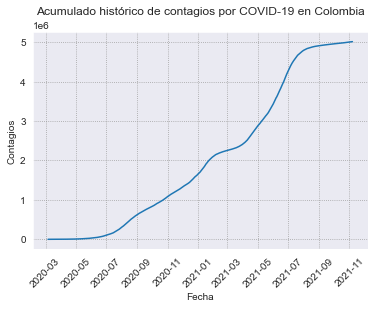

In [17]:
plt.xticks(rotation = 45)
sns.lineplot(data = df_cont_dia, x= df_cont_dia.index, y = "Acumulado Contagios")
plt.title("Acumulado histórico de contagios por COVID-19 en Colombia", y = 1.05)
plt.xlabel(xlabel = "Fecha")
plt.ylabel("Contagios")
plt.show()

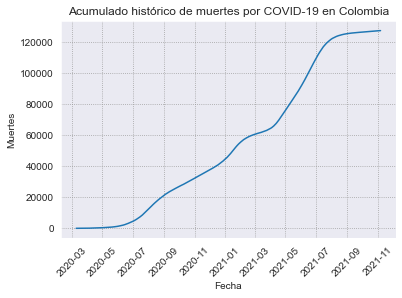

In [18]:
plt.xticks(rotation = 45)
sns.lineplot(data = df_muertes_dia, x= df_muertes_dia.index, y = "Acumulado Muertes")
plt.title("Acumulado histórico de muertes por COVID-19 en Colombia")
plt.xlabel(xlabel = "Fecha")
plt.ylabel("Muertes")
plt.show()

In [19]:
cont_muert_dia = df_cont_dia.merge(df_muertes_dia, left_on = df_cont_dia.index, right_on = df_muertes_dia.index,
                                   how = "left")[["key_0", "Contagios", "Muertes"]].rename(columns = {"key_0" : "Fecha"}).dropna()
cont_muert_dia.tail()

,Fecha,Contagios,Muertes
604,2021-11-03,1697,27.0
605,2021-11-04,1908,17.0
606,2021-11-05,1975,19.0
607,2021-11-06,1999,22.0
608,2021-11-07,2061,2.0


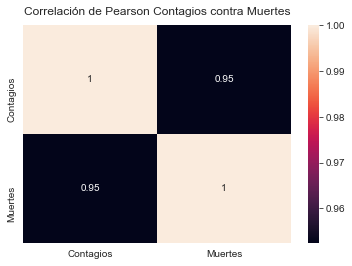

In [20]:
sns.heatmap(cont_muert_dia.corr(), annot = True)
plt.title("Correlación de Pearson Contagios contra Muertes", y = 1.02)
plt.show()

# Muy fuerte correlación entre la cantidad de contagios y muertes por día.

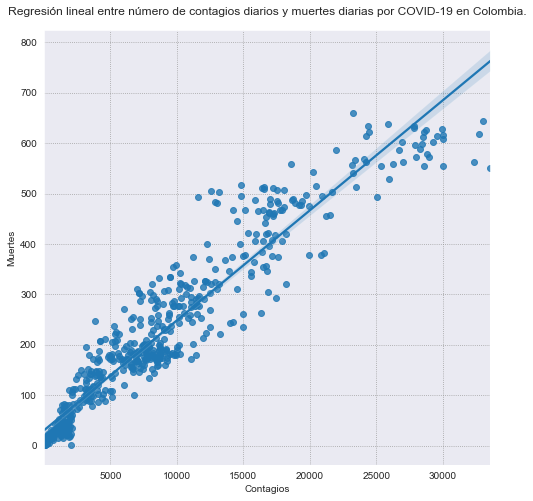

In [21]:
plt.figure(figsize = (8,8))
sns.regplot(x= "Contagios",y = "Muertes",data = cont_muert_dia)
plt.title("Regresión lineal entre número de contagios diarios y muertes diarias por COVID-19 en Colombia.", y = 1.02)
plt.show()

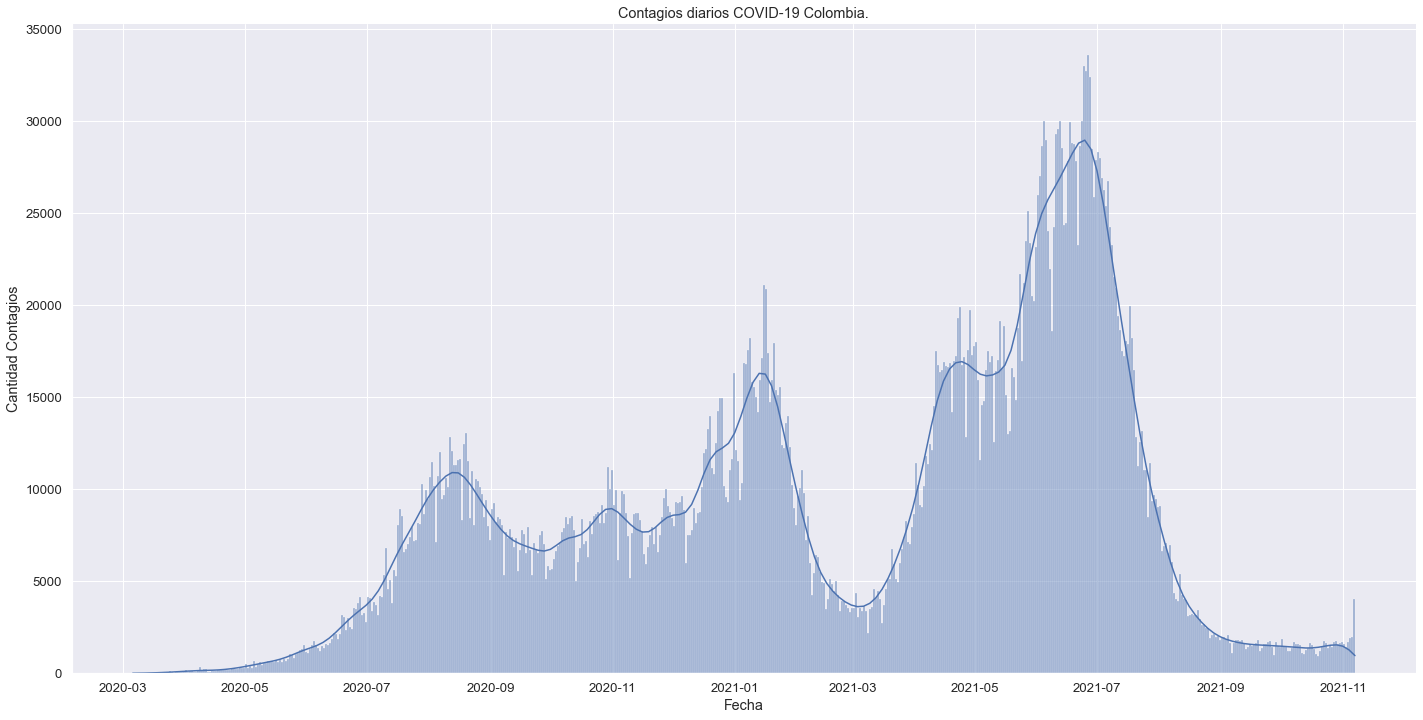

In [22]:
sns.set(font_scale=1.2)
total_days = (df.iloc[-1][0] - df.iloc[0][0]).days
a = sns.displot(x = "fecha reporte web",data = df_cat, kde = True, height = 10, aspect = 2, bins = total_days)
a.set(title = "Contagios diarios COVID-19 Colombia.", xlabel = "Fecha", ylabel = "Cantidad Contagios")
plt.show()

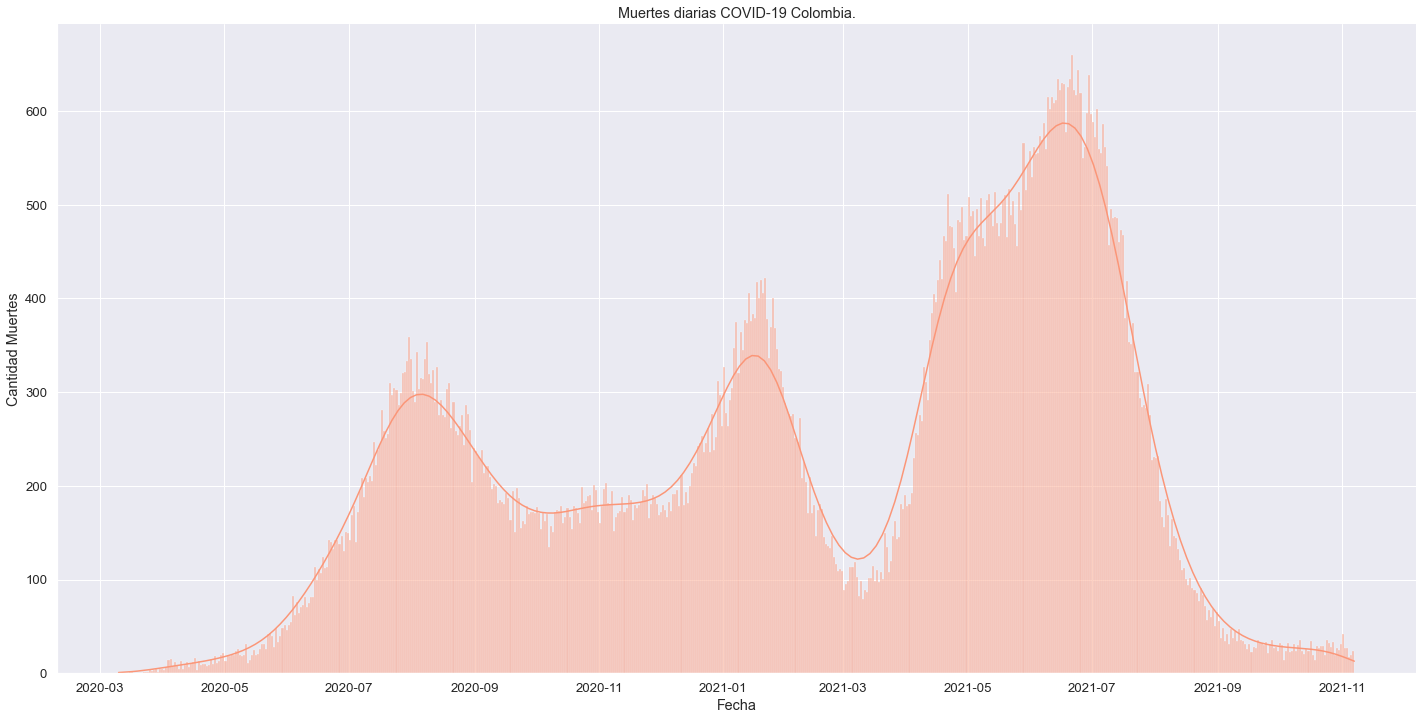

In [23]:
sns.set(font_scale=1.2)
total_days = (df_muertes.index[-1] - df_muertes.index[0]).days
a = sns.displot(x = df_muertes.index,data = df_muertes, kde = True, 
                height = 10, aspect = 2, bins = total_days, color = "#FB9678")
a.set(title = "Muertes diarias COVID-19 Colombia.", xlabel = "Fecha", ylabel = "Cantidad Muertes")
plt.show()

In [24]:
cont_dept = df_cat.groupby("Nombre departamento", as_index = False).size().sort_values(by = "size", ascending = False)
cont_dept.rename(columns = {"size" : "Contagios Totales"}, inplace = True)
cont_dept.head()

,Nombre departamento,Contagios Totales
26,SANTAFE DE BOGOTA D.C,1456382
1,ANTIOQUIA,758989
30,VALLE DEL CAUCA,412491
3,ATLANTICO,332235
13,CUNDINAMARCA,264623


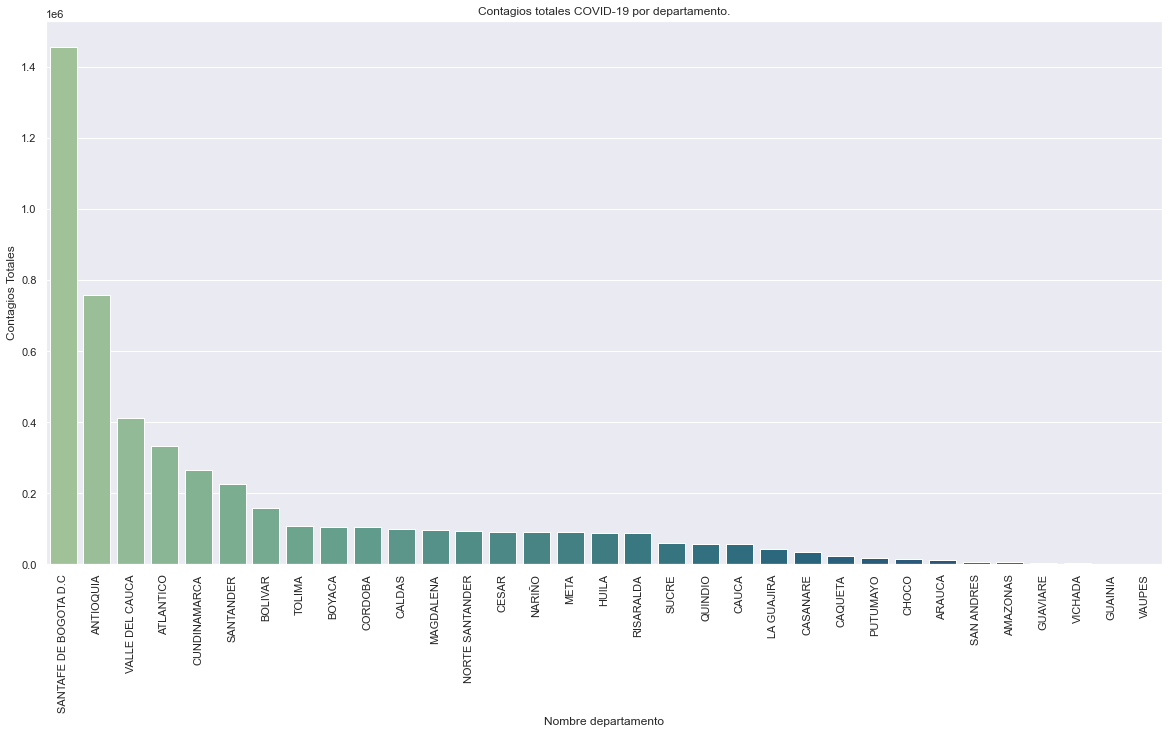

In [25]:
sns.set(font_scale=1)
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.barplot(data = cont_dept, x="Nombre departamento" ,y="Contagios Totales", palette = "crest")
plt.title("Contagios totales COVID-19 por departamento.")
plt.show()

In [26]:
cont_dept_dia = df.groupby(["Nombre departamento","fecha reporte web"], as_index = False).size()\
.sort_values(by = ["Nombre departamento", "fecha reporte web"]).rename(columns = {"size" : "Contagios"})
cont_dept_dia

,Nombre departamento,fecha reporte web,Contagios
0,AMAZONAS,2020-04-17,1
1,AMAZONAS,2020-04-18,3
2,AMAZONAS,2020-04-21,2
3,AMAZONAS,2020-04-23,6
4,AMAZONAS,2020-04-24,2
...,...,...,...
18881,VICHADA,2021-10-31,1
18882,VICHADA,2021-11-04,2
18883,VICHADA,2021-11-05,6
18884,VICHADA,2021-11-06,3


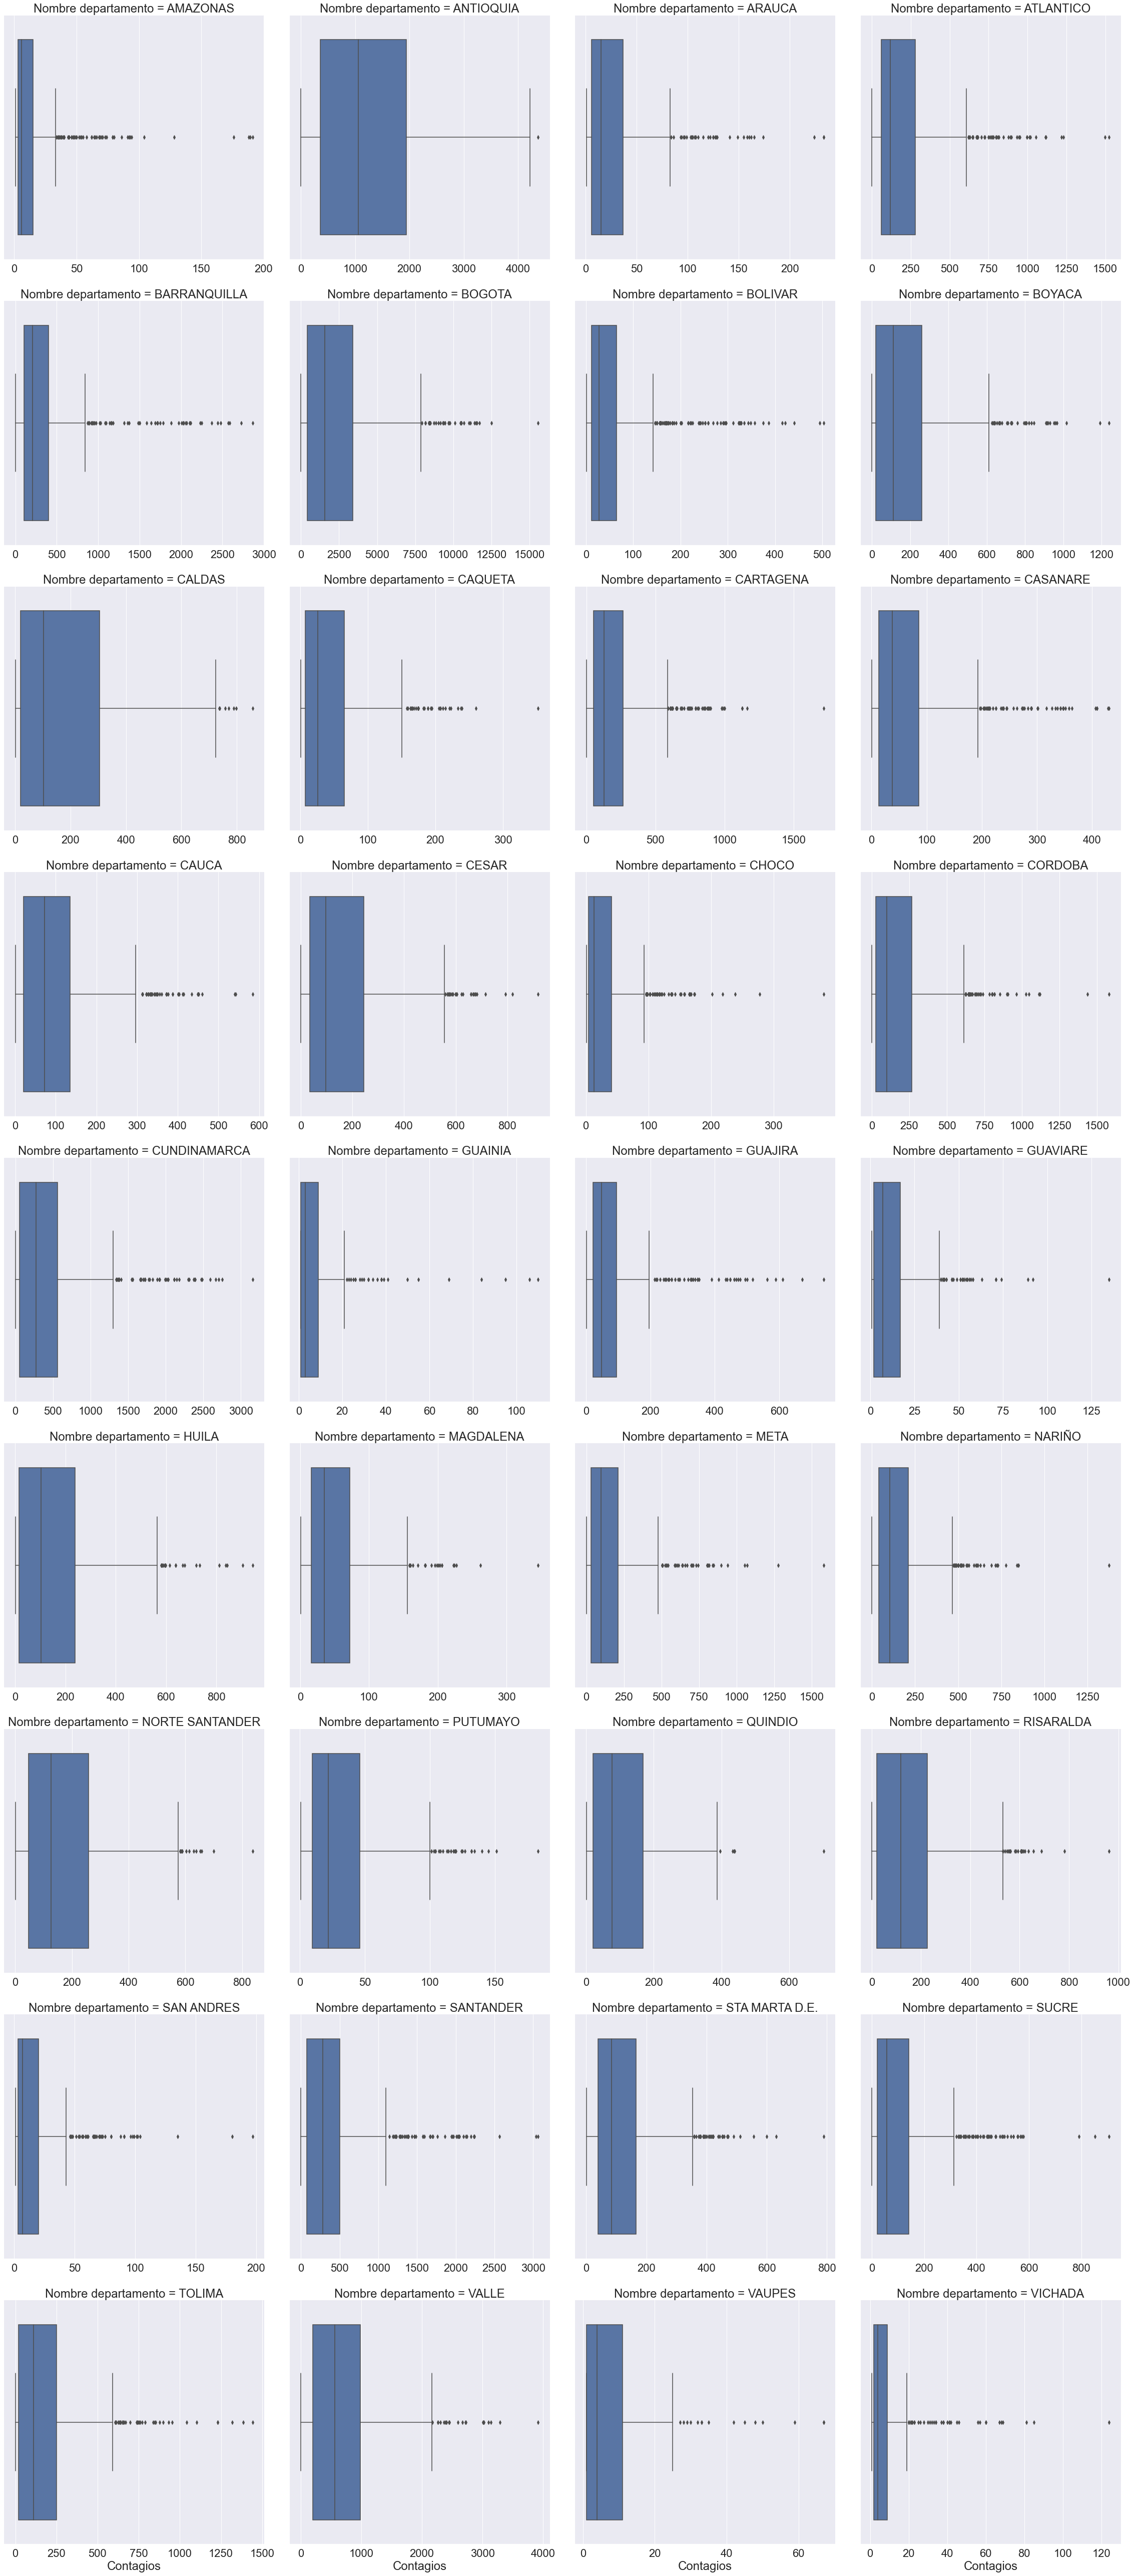

In [27]:
sns.set(font_scale= 2)
g = sns.FacetGrid(cont_dept_dia, col ="Nombre departamento", col_wrap = 4, sharex = False, height = 8, aspect = 1)
g.map(sns.boxplot,"Contagios", order = list(set(cont_dept_dia["Nombre departamento"].unique())))
plt.show()

In [28]:
muertes_dept = df_muertes.groupby("Nombre departamento").size().sort_values(ascending = False).to_frame("Total Muertes")
dept_est = cont_dept.merge(muertes_dept, on = "Nombre departamento").set_index("Nombre departamento")
dept_est["Porcentaje Mortalidad"] = 100*dept_est["Total Muertes"]/dept_est["Contagios Totales"]
dept_est = dept_est.sort_values(by = "Porcentaje Mortalidad", ascending = False)
dept_est.head()

,Contagios Totales,Total Muertes,Porcentaje Mortalidad
Nombre departamento,,,
NORTE SANTANDER,94030,4369,4.646389
CAQUETA,22949,949,4.135256
PUTUMAYO,16573,675,4.072890
AMAZONAS,6849,256,3.737772
CORDOBA,104261,3769,3.614966


# Is mortality rate related to poverty?
Let's load a dataframe from the National Administrative Department of Statistics of Colombia (DANE) with information about the gdp per capita of each colombian department.

In [29]:
pib = pd.read_excel("pib.xlsx", sheet_name = "Cuadro 3",
                    skiprows = list(range(0,8)),
                    usecols = ["DEPARTAMENTOS","2020pr"]).dropna()
pib = pib.rename(columns = {"2020pr" : "PIBH_2020"})
pib.head()

,DEPARTAMENTOS,PIBH_2020
0,COLOMBIA,1.991015e+07
1,Amazonas,9.654627e+06
2,Antioquia,2.241198e+07
3,Arauca,1.749813e+07
4,Atlántico,1.650281e+07


In [30]:
deptos = list(set(dept_est.index))
print(deptos)

['VALLE DEL CAUCA', 'VAUPES', 'MAGDALENA', 'LA GUAJIRA', 'CALDAS', 'BOLIVAR', 'NORTE SANTANDER', 'TOLIMA', 'PUTUMAYO', 'ATLANTICO', 'RISARALDA', 'CASANARE', 'SUCRE', 'GUAINIA', 'CAUCA', 'META', 'VICHADA', 'CESAR', 'QUINDIO', 'NARIÑO', 'CHOCO', 'HUILA', 'GUAVIARE', 'CUNDINAMARCA', 'SANTANDER', 'ANTIOQUIA', 'BOYACA', 'CORDOBA', 'SAN ANDRES', 'AMAZONAS', 'ARAUCA', 'SANTAFE DE BOGOTA D.C', 'CAQUETA']


In [31]:
for dept in pib.DEPARTAMENTOS.unique():
    if(dept.upper() not in deptos):
        print(dept)

COLOMBIA
Atlántico
Bogotá D.C.
Bolívar
Boyacá
Caquetá
Chocó
Córdoba
Guainía
Norte de Santander
Quindío
San Andrés, Providencia y Santa Catalina (Archipiélago)
Vaupés


In [32]:
import re

In [33]:
def sta_dept(df, col):
    regex = {
        r'bogot(a|á)': "SANTAFE DE BOGOTA D.C",
        r'antioquia' : "ANTIOQUIA",
        r'cesar'     : "CESAR",
        r'n\w*\.*\ssantander' : 'NORTE SANTANDER',
        r'putumayo' : 'PUTUMAYO',
        r'nari(n|ñ)o' : "NARIÑO",
        r'tolima' : "TOLIMA",
        r'c(ó|o)rdoba' : "CORDOBA",
        r'guaviare' : "GUAVIARE",
        r'guajira' : 'LA GUAJIRA',
        r'andr(é|e)s' : "SAN ANDRES",
        r'arauca' : "ARAUCA",
        r'casanare' : "CASANARE",
        r'guain(i|í)a' :  "GUAINIA",
        r'caquet(a|á)' : "CAQUETA",
        r'caldas' : "CALDAS",
        r'^cauca' : "CAUCA",
        r'huila' : "HUILA",
        r'choc(ó|o)' : "CHOCO",
        r'atl(á|a)ntico' : "ATLANTICO",
        r'quind(í|i)o' : "QUINDIO",
        r'bol(i|í)var' : "BOLIVAR",
        r'\Santander' : "SANTANDER",
        r'vichada' : "VICHADA",
        r'sucre' : "SUCRE",
        r'boyac(a|á)' : "BOYACA",
        r'risaralda' : "RISARALDA",
        r'meta' : "META",
        r'magdalena' : "MAGDALENA",
        r'vaup(é|e)s' : "VAUPES",
        r'cundinamarca' : "CUNDINAMARCA",
        r'amazonas' : "AMAZONAS",
        r'valle' : "VALLE DEL CAUCA"    
    }
    for dept in df[col].unique():
        for reg in regex:
            if(re.search(reg, dept.lower())):
                df[col].replace({dept : regex[reg]}, inplace = True)

sta_dept(pib, "DEPARTAMENTOS")
pib.DEPARTAMENTOS.unique()

array(['COLOMBIA', 'AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO',
       'SANTAFE DE BOGOTA D.C', 'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA',
       'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA',
       'GUAINIA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META',
       'NARIÑO', 'SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA',
       'SAN ANDRES', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES',
       'VICHADA'], dtype=object)

In [34]:
pib_muert = dept_est.reset_index().merge(pib, left_on = "Nombre departamento", right_on = "DEPARTAMENTOS")\
.drop("DEPARTAMENTOS", axis = "columns").sort_values(by = ["Porcentaje Mortalidad"], ascending = [False])
pib_muert.head()

,Nombre departamento,Contagios Totales,Total Muertes,Porcentaje Mortalidad,PIBH_2020
0,CAQUETA,22949,949,4.135256,1.018447e+07
1,PUTUMAYO,16573,675,4.072890,9.274611e+06
2,AMAZONAS,6849,256,3.737772,9.654627e+06
3,CORDOBA,104261,3769,3.614966,9.932847e+06
4,HUILA,88510,3145,3.553271,1.497371e+07


In [35]:
pib_muert[["Porcentaje Mortalidad" , "PIBH_2020"]].corr()

,Porcentaje Mortalidad,PIBH_2020
Porcentaje Mortalidad,1.000000,-0.103247
PIBH_2020,-0.103247,1.000000


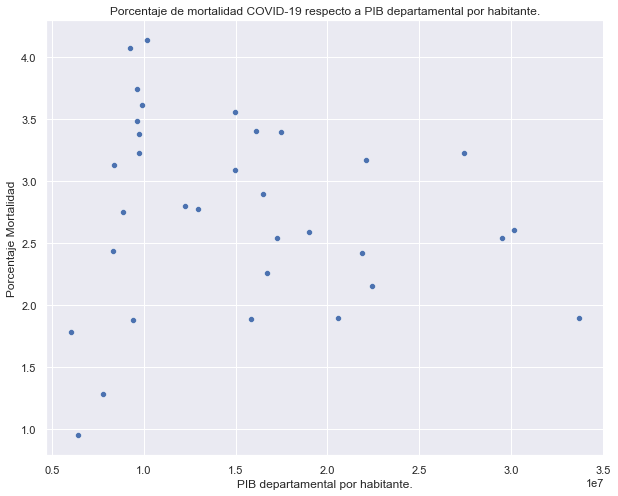

In [36]:
sns.set(font_scale= 1)
plt.figure(figsize = (10,8))
sns.scatterplot(x = "PIBH_2020", y= "Porcentaje Mortalidad" ,data = pib_muert)
plt.title("Porcentaje de mortalidad COVID-19 respecto a PIB departamental por habitante.")
plt.xlabel("PIB departamental por habitante.")
plt.show()

## COVID-19's mortal rate is not related to poberty in Colombia.

# Muertes por edad

# ANÁLISIS DE DATOS DE EDADES

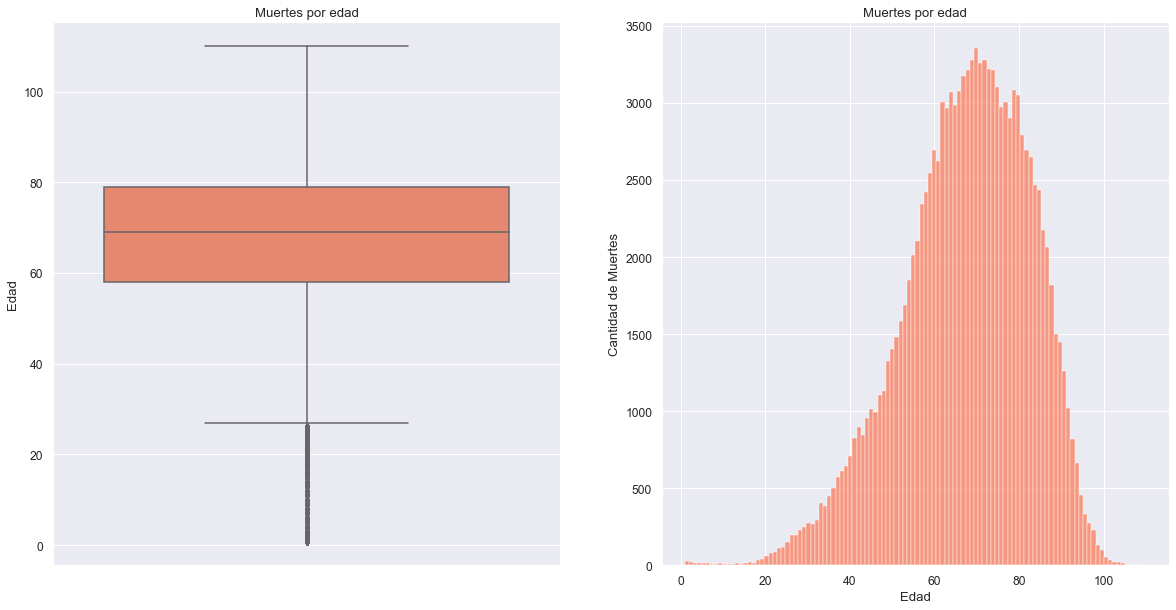

In [37]:
sns.set(font_scale= 1.1)
fig, ax = plt.subplots(1,2,figsize = (20, 10))
sns.boxplot(data = df_muertes, y = "Edad", ax = ax[0], color = "#F97C5B")
sns.histplot(data = df_muertes, x = "Edad", ax = ax[1], bins = 110, color = "#F97C5B")
ax[0].set(title = "Muertes por edad")
ax[1].set(title = "Muertes por edad", ylabel = "Cantidad de Muertes")
plt.show()

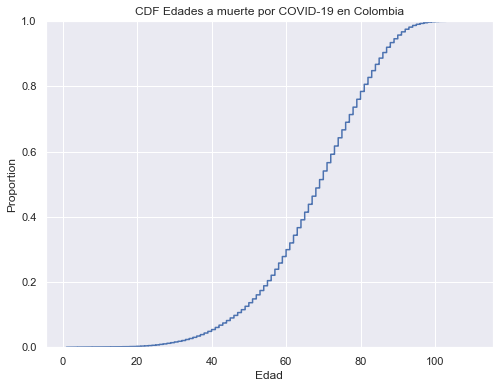

In [38]:
sns.set(font_scale= 1)
plt.figure(figsize = (8,6))
sns.ecdfplot(data= df_muertes, x="Edad")
plt.title("CDF Edades a muerte por COVID-19 en Colombia")
plt.show()

In [39]:
olas ={"Primera Ola" : {"Inicio":"2020-03-06", "Fin":"2020-10-01"},
       "Segunda Ola " : {"Inicio":"2020-10-02","Fin":"2021-03-12"},
       "Tercera Ola" : {"Inicio":"2021-03-13", "Fin":"2021-08-01"}
      }
picos_contagios = pd.DataFrame()
df_copy = df_cont_dia.reset_index()
for k in olas.keys():
    pico = df_copy[(df_copy["fecha reporte web"]>= olas[k]["Inicio"]) & 
                                (df_copy["fecha reporte web"] <= olas[k]["Fin"])]\
                                .nlargest(1,"Contagios")
    picos_contagios = pd.concat([picos_contagios,pico])
picos_contagios.index, picos_contagios.columns = (["Primer Pico", "Segundo Pico", "Tercer Pico"], 
                                                  ["Fecha", "Contagio Día","Acumulado Contagios"])
picos_contagios

,Fecha,Contagio Día,Acumulado Contagios
Primer Pico,2020-08-19,13054,502181
Segundo Pico,2021-01-15,21082,1870237
Tercer Pico,2021-06-26,33593,4126336


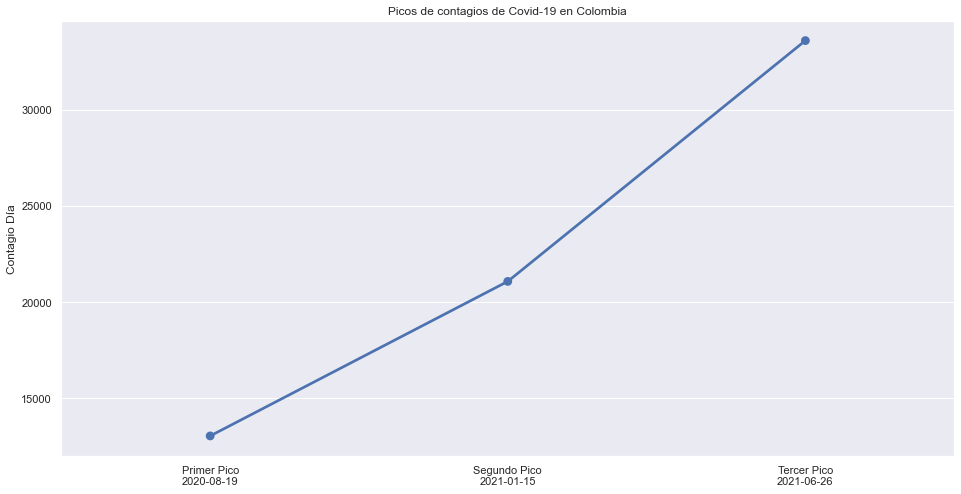

In [40]:
sns.set(font_scale= 1)
plt.figure(figsize = (16,8))
sns.pointplot(data = picos_contagios, x = picos_contagios.index, y = "Contagio Día")
plt.title("Picos de contagios de Covid-19 en Colombia")
plt.xticks(ticks = [0, 1, 2],labels = [f"Primer Pico\n{(picos_contagios.loc['Primer Pico']['Fecha']).date()}",
                                       f"Segundo Pico\n{(picos_contagios.loc['Segundo Pico']['Fecha']).date()}",
                                       f"Tercer Pico\n{(picos_contagios.loc['Tercer Pico']['Fecha']).date()}"])
plt.show()

In [41]:
df_cat["Recuperado"].value_counts()

Recuperado    4858390
Fallecido      127533
Activo          12151
Name: Recuperado, dtype: int64

In [42]:
df_dates = df_cat[date_columns + ["Recuperado"] + ["Tipo de recuperación"]].drop("Fecha de notificación", axis = "columns")
df_dates

,fecha reporte web,Fecha de recuperación,Fecha de diagnóstico,Fecha de inicio de síntomas,Fecha de muerte,Recuperado,Tipo de recuperación
0,2020-03-06,2020-03-13,2020-03-06,2020-02-27,NaT,Recuperado,PCR
1,2020-03-09,2020-03-19,2020-03-09,2020-03-04,NaT,Recuperado,PCR
2,2020-03-09,2020-03-15,2020-03-09,2020-02-29,NaT,Recuperado,PCR
3,2020-03-11,2020-03-26,2020-03-11,2020-03-06,NaT,Recuperado,PCR
4,2020-03-11,2020-03-23,2020-03-11,2020-03-08,NaT,Recuperado,PCR
...,...,...,...,...,...,...,...
5015037,2021-11-07,NaT,2021-06-16,2021-06-02,NaT,Activo,NaN
5015038,2021-11-07,NaT,2021-06-16,2021-06-02,NaT,Activo,NaN
5015039,2021-11-07,NaT,2021-06-16,2021-06-02,NaT,Activo,NaN
5015040,2021-11-07,NaT,2021-06-16,2021-06-02,NaT,Activo,NaN


In [43]:
recu = df_dates[df_dates.Recuperado == "Recuperado"].drop("Fecha de muerte", axis = 1)
fall = df_dates[df_dates.Recuperado == "Fallecido"].drop(["Fecha de recuperación", "Tipo de recuperación"], axis = 1)
display(recu.head())
display(fall.head())

,fecha reporte web,Fecha de recuperación,Fecha de diagnóstico,Fecha de inicio de síntomas,Recuperado,Tipo de recuperación
0,2020-03-06,2020-03-13,2020-03-06,2020-02-27,Recuperado,PCR
1,2020-03-09,2020-03-19,2020-03-09,2020-03-04,Recuperado,PCR
2,2020-03-09,2020-03-15,2020-03-09,2020-02-29,Recuperado,PCR
3,2020-03-11,2020-03-26,2020-03-11,2020-03-06,Recuperado,PCR
4,2020-03-11,2020-03-23,2020-03-11,2020-03-08,Recuperado,PCR


,fecha reporte web,Fecha de diagnóstico,Fecha de inicio de síntomas,Fecha de muerte,Recuperado
151,2020-03-20,2020-03-20,2020-03-10,2020-04-05,Fallecido
152,2020-03-20,2020-03-20,2020-03-18,2020-04-06,Fallecido
156,2020-03-20,2020-03-20,2020-03-12,2020-03-23,Fallecido
187,2020-03-21,2020-03-21,2020-03-08,2020-03-22,Fallecido
196,2020-03-16,2020-03-16,2020-03-06,2020-03-16,Fallecido


In [44]:
recu["Tiempo de recuperación"] = (recu["Fecha de recuperación"] - recu["Fecha de inicio de síntomas"]).dt.days
recu.head()

,fecha reporte web,Fecha de recuperación,Fecha de diagnóstico,Fecha de inicio de síntomas,Recuperado,Tipo de recuperación,Tiempo de recuperación
0,2020-03-06,2020-03-13,2020-03-06,2020-02-27,Recuperado,PCR,15.0
1,2020-03-09,2020-03-19,2020-03-09,2020-03-04,Recuperado,PCR,15.0
2,2020-03-09,2020-03-15,2020-03-09,2020-02-29,Recuperado,PCR,15.0
3,2020-03-11,2020-03-26,2020-03-11,2020-03-06,Recuperado,PCR,20.0
4,2020-03-11,2020-03-23,2020-03-11,2020-03-08,Recuperado,PCR,15.0


## Confidence interval for recovery days.
Taking a confidence interval of 95%

In [45]:
p_inf = np.percentile(recu["Tiempo de recuperación"], 2.5)
p_sup = np.percentile(recu["Tiempo de recuperación"], 97.5)
median_rec = np.median(recu["Tiempo de recuperación"])
min_rec_time = recu["Tiempo de recuperación"].min() 
print(f"Min recovery time: {min_rec_time} days")
print(f"Median: {median_rec:.0f} days")
print(f"Percentile 2.5: {p_inf:.0f} days")
print(f"Percentile 97.5: {p_sup:.0f} days")

Min recovery time: 0.0 days
Median: nan days
Percentile 2.5: nan days
Percentile 97.5: nan days


95% of people in Colombia recovers from COVID-19 within the first 14 - 32 days since they started to present symptoms.
However, half of the recovered people does it whitin the first 17 days.

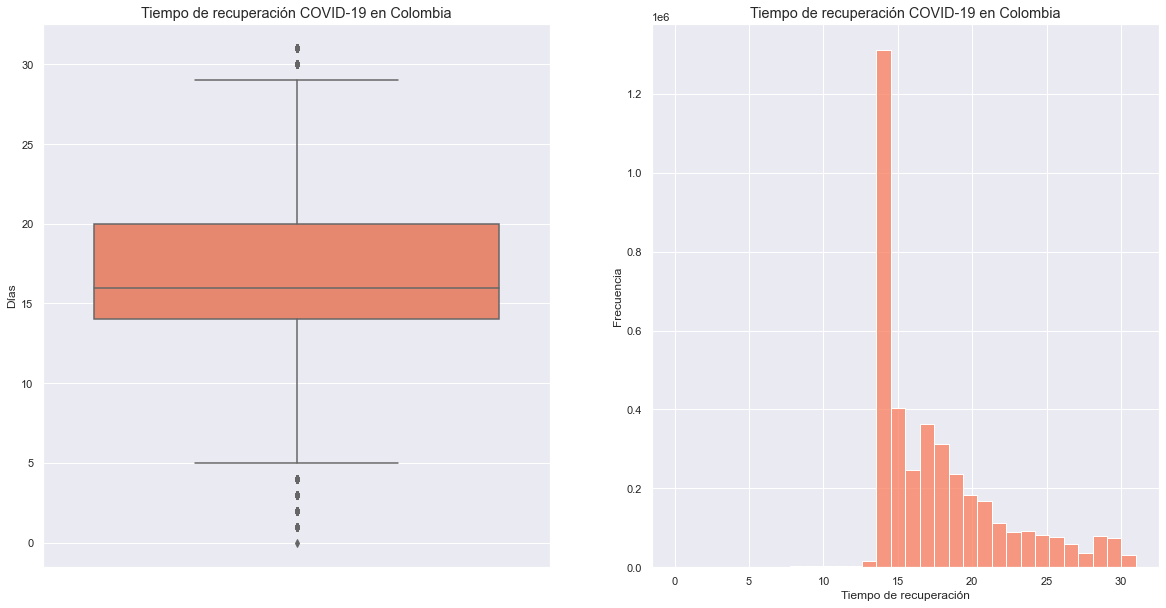

In [46]:
fig, ax = plt.subplots(1,2,figsize = (20, 10))
sns.set(font_scale= 1.2)
recu = recu[recu["Tiempo de recuperación"] < 32]
sns.boxplot(data = recu, y = "Tiempo de recuperación", ax = ax[0], color = "#F97C5B")
sns.histplot(data = recu, x = "Tiempo de recuperación", ax = ax[1], bins = len(recu["Tiempo de recuperación"].unique()), color = "#F97C5B")
ax[0].set(title = "Tiempo de recuperación COVID-19 en Colombia", ylabel = "Días")
ax[1].set(title = "Tiempo de recuperación COVID-19 en Colombia", ylabel = "Frecuencia")
plt.show()

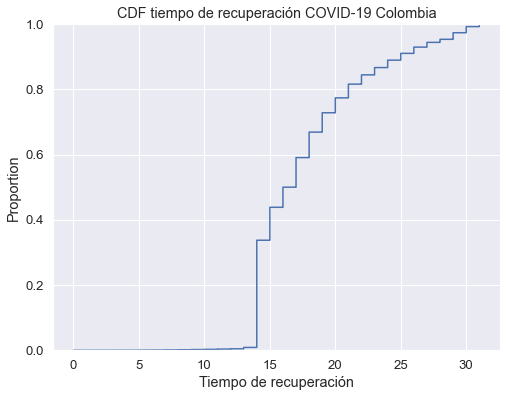

In [47]:
plt.figure(figsize = (8,6))
plt.title("CDF tiempo de recuperación COVID-19 Colombia")
sns.ecdfplot(data=recu, x="Tiempo de recuperación")
plt.show()

# Death times analysis

In [48]:
fall["Tiempo a muerte"] = (fall["Fecha de muerte"] - fall["Fecha de inicio de síntomas"]).dt.days
fall.head()

,fecha reporte web,Fecha de diagnóstico,Fecha de inicio de síntomas,Fecha de muerte,Recuperado,Tiempo a muerte
151,2020-03-20,2020-03-20,2020-03-10,2020-04-05,Fallecido,26
152,2020-03-20,2020-03-20,2020-03-18,2020-04-06,Fallecido,19
156,2020-03-20,2020-03-20,2020-03-12,2020-03-23,Fallecido,11
187,2020-03-21,2020-03-21,2020-03-08,2020-03-22,Fallecido,14
196,2020-03-16,2020-03-16,2020-03-06,2020-03-16,Fallecido,10


In [49]:
f_inf = np.percentile(fall["Tiempo a muerte"], 2.5)
f_sup = np.percentile(fall["Tiempo a muerte"], 97.5)
median_fall = np.median(fall["Tiempo a muerte"])
min_fall_time = fall["Tiempo a muerte"].min() 
print(f"Min time to death: {min_fall_time} days")
print(f"Median: {median_fall:.0f} days")
print(f"Percentile 2.5: {f_inf:.0f} days")
print(f"Percentile 97.5: {f_sup:.0f} days")

Min time to death: 0 days
Median: 17 days
Percentile 2.5: 1 days
Percentile 97.5: 55 days


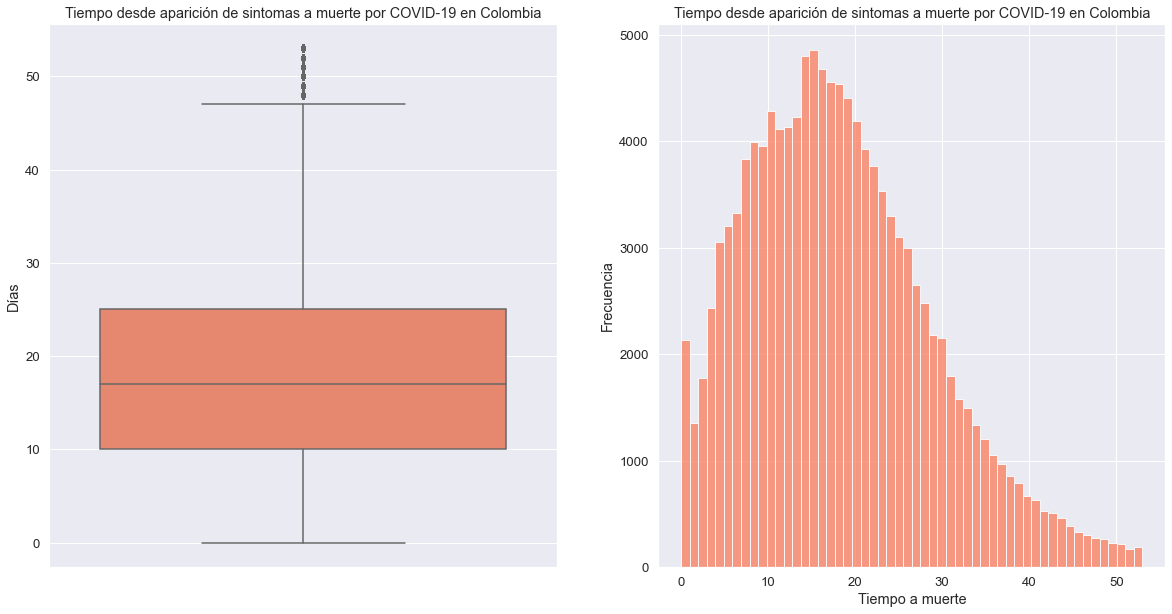

In [50]:
fig, ax = plt.subplots(1,2,figsize = (20, 10))
sns.set(font_scale= 1.2)
fall = fall[fall["Tiempo a muerte"] < 54]
sns.boxplot(data = fall, y = "Tiempo a muerte", ax = ax[0], color = "#F97C5B")
sns.histplot(data = fall, x = "Tiempo a muerte", ax = ax[1], bins = len(fall["Tiempo a muerte"].unique()), color = "#F97C5B")
ax[0].set(title = "Tiempo desde aparición de sintomas a muerte por COVID-19 en Colombia", ylabel = "Días")
ax[1].set(title = "Tiempo desde aparición de sintomas a muerte por COVID-19 en Colombia", ylabel = "Frecuencia")
plt.show()

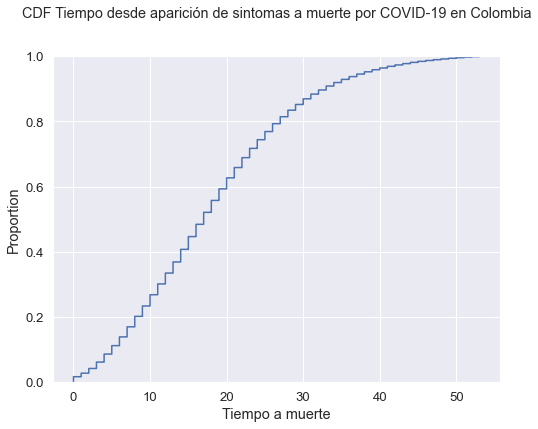

In [51]:
plt.figure(figsize = (8,6))
plt.title("CDF Tiempo desde aparición de sintomas a muerte por COVID-19 en Colombia", y = 1.1)
sns.ecdfplot(data=fall, x="Tiempo a muerte")
plt.show()

In [52]:
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input 
from jupyter_dash import JupyterDash

In [53]:
import requests
url = "https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json"
geojson = requests.get(url).json()

In [54]:
cont_dept.head()

,Nombre departamento,Contagios Totales
26,SANTAFE DE BOGOTA D.C,1456382
1,ANTIOQUIA,758989
30,VALLE DEL CAUCA,412491
3,ATLANTICO,332235
13,CUNDINAMARCA,264623


In [55]:
cont_dia_dept = df_cat.groupby(["Nombre departamento","fecha reporte web"], as_index= False).size().set_index("Nombre departamento")
cont_dia_dept.columns = ["Fecha", "Contagios Diarios"]
cont_dia_dept.head()

,Fecha,Contagios Diarios
Nombre departamento,,
AMAZONAS,2020-04-17,1
AMAZONAS,2020-04-18,3
AMAZONAS,2020-04-21,2
AMAZONAS,2020-04-23,6
AMAZONAS,2020-04-24,2


In [56]:
muert_dia_dept = df_muertes.groupby(["Nombre departamento","fecha reporte web"], as_index= False).size().set_index("Nombre departamento")
muert_dia_dept.columns = ["Fecha", "Muertes Diarias"]
muert_dia_dept.head()

,Fecha,Muertes Diarias
Nombre departamento,,
AMAZONAS,2020-04-23,1
AMAZONAS,2020-04-25,2
AMAZONAS,2020-04-28,6
AMAZONAS,2020-04-29,1
AMAZONAS,2020-05-01,1


In [57]:
muertes_departamentos = df_muertes.groupby("Nombre departamento")["ID de caso"].size()\
.sort_values(ascending = False).to_frame("Muertes Totales").reset_index()
muertes_departamentos.columns = ["Nombre departamento", "Muertes Totales"]
muertes_departamentos.head()

,Nombre departamento,Muertes Totales
0,SANTAFE DE BOGOTA D.C,27679
1,ANTIOQUIA,16384
2,VALLE DEL CAUCA,13084
3,ATLANTICO,9609
4,SANTANDER,7330


In [58]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([
                       dcc.Dropdown(id = "select_dept",
                                    options = [{"label" : "COLOMBIA", "value" : "COLOMBIA"}]+[{"label" : x if x != "SANTAFE DE BOGOTA D.C" else "BOGOTA D.C", "value" : x} for x in cont_dept["Nombre departamento"].unique()],
                                    value = "COLOMBIA",
                                    style = {"width" : "45%"}),
                       html.Div([dcc.Graph(id = "choropleth",
                                 style = {"width" : "100%"}),
                                 dcc.Graph(id = "line_cases",
                                 style = {"width" : "100%", "float" : "right"})],
                                style={'columnCount': 2}),
                       html.Div([dcc.Graph(id = "choro_death",
                                           style = {"width" : "100%"}),
                                 dcc.Graph(id = "line_deaths",
                                           style = {"width" : "100%", "float" : "right"})],
                                style = {"columnCount" : 2})                    
                      ])
@app.callback(
    Output("choropleth", "figure"), 
    [Input("select_dept", "value")])
def display_choropleth(select_dept):
    if(select_dept == "COLOMBIA"): 
        dff = cont_dept
    else:
        dff = cont_dept[cont_dept["Nombre departamento"] == select_dept]

    fig = px.choropleth(dff, 
                    locations= "Nombre departamento",
                    geojson  = geojson,
                    featureidkey = "properties.NOMBRE_DPT",
                    color="Contagios Totales", 
                    color_continuous_scale="sunsetdark")
    fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
    fig.update_layout(title_text = f'Casos de infección en {select_dept.title()}')
    return fig

@app.callback(
    Output("line_cases", "figure"), 
    [Input("select_dept", "value")])
def display_line_cas(select_dept):
    if(select_dept == "COLOMBIA"): 
        dff = cont_dia_dept.groupby("Fecha").sum().reset_index()
    else:
        dff =  cont_dia_dept.loc[select_dept]
    fig = px.line(dff, x = "Fecha", y = "Contagios Diarios")
    fig.update_layout(
    title_text = f"Contagios diarios COVID-19 en {select_dept.title()}")
    return fig

# Muertes

@app.callback(
    Output("choro_death", "figure"), 
    [Input("select_dept", "value")])
def display_choro_death(select_dept):
    if(select_dept == "COLOMBIA"): 
        dff = muertes_departamentos
    else:
        dff = muertes_departamentos[muertes_departamentos["Nombre departamento"] == select_dept]

    fig = px.choropleth(dff, 
                    locations= "Nombre departamento",
                    geojson  = geojson,
                    featureidkey = "properties.NOMBRE_DPT",
                    color="Muertes Totales", 
                    color_continuous_scale="aggrnyl")
    fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
    fig.update_layout(title_text = f'Muertes en {select_dept.title()}')
    return fig

@app.callback(
    Output("line_deaths", "figure"), 
    [Input("select_dept", "value")])
def display_line_deaths(select_dept):
    if(select_dept == "COLOMBIA"): 
        dff = muert_dia_dept.groupby("Fecha").sum().reset_index()
    else:
        dff =  muert_dia_dept.loc[select_dept]
    fig = px.line(dff, x = "Fecha", y = "Muertes Diarias")
    fig.update_layout(
    title_text = f"Muertes diarias COVID-19 en {select_dept.title()}")
    return fig

app.run_server()

Dash app running on http://127.0.0.1:8050/


In [59]:
app._terminate_server_for_port("localhost", 8050)

# Infections and deaths forecasting

In [60]:
import statsmodels.api as sm

In [61]:
cont_muert_dia.head()

,Fecha,Contagios,Muertes
2,2020-03-11,6,1.0
6,2020-03-15,16,1.0
7,2020-03-16,14,1.0
13,2020-03-22,29,1.0
14,2020-03-23,73,1.0


In [62]:
X = cont_muert_dia["Contagios"]
X = sm.add_constant(X)
Y = cont_muert_dia["Muertes"]
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Muertes   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     5833.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          2.53e-310
Time:                        16:40:47   Log-Likelihood:                -3216.8
No. Observations:                 599   AIC:                             6438.
Df Residuals:                     597   BIC:                             6446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1171      3.203      9.403      0.000      23.827      36.407
Contagios      0.0218      0.000     76.377      0.000       0.021       0.022
==============================================================================
Omnibus:                       53.421   Durbin-Watson:                   0.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.701
Skew:                           0.569   Prob(JB):                     6.09e-22
Kurtosis:                       4.619   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

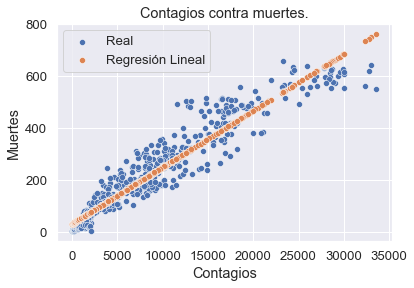

In [63]:
pred = results.predict(X).values
sns.scatterplot(x = X["Contagios"], y = Y, label = "Real")
sns.scatterplot(x = X["Contagios"],y = pred, label = "Regresión Lineal")
plt.title("Contagios contra muertes.")
plt.show()

In [64]:
from sklearn.linear_model import Ridge, Lasso

In [65]:
clf = Ridge(alpha=1.0)
clf.fit(X, Y)
print(f"R^2 for Ridge: {clf.score(X, Y):.3f}")

R^2 for Ridge: 0.907


In [67]:
lasso = Lasso()
lasso.fit(X, Y)
print(f"R^2 for Lasso: {lasso.score(X, Y):.3f}")

R^2 for Lasso: 0.907
